In [132]:
print("jupyter pandas seaborn notebook")

jupyter pandas seaborn notebook


In [133]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

movies = pd.read_table("./movies.dat", sep="::", header=0,
names=["MovieID","Title","Genres"], encoding='cp1250', engine='python')
movies

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


In [134]:
users = pd.read_table("./users.dat", sep="::", header=0, names=["UserID","Gender","Age","Occupation", "Zip-code"], encoding='cp1250', engine='python')
users

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
...,...,...,...,...,...
6034,6036,F,25,15,32603
6035,6037,F,45,1,76006
6036,6038,F,56,1,14706
6037,6039,F,45,0,01060


In [135]:
ratings = pd.read_table("./ratings.dat", sep="::", header=0, names=["UserID","MovieID","Rating","Timestamp"], encoding='cp1250', engine='python')
ratings

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
...,...,...,...,...
1000203,6040,1091,1,956716541
1000204,6040,1094,5,956704887
1000205,6040,562,5,956704746
1000206,6040,1096,4,956715648


In [136]:
mergedTable = pd.merge(pd.merge(users, ratings, on="UserID"), movies, on="MovieID")
mergedTable

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,2,M,56,16,70072,1357,5,978298709,Shine (1996),Drama|Romance
1,8,M,25,12,11413,1357,4,978230800,Shine (1996),Drama|Romance
2,10,F,35,1,95370,1357,5,978227625,Shine (1996),Drama|Romance
3,18,F,18,3,95825,1357,5,978156876,Shine (1996),Drama|Romance
4,33,M,45,3,55421,1357,4,978109488,Shine (1996),Drama|Romance
...,...,...,...,...,...,...,...,...,...,...
998075,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
998076,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
998077,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
998078,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [137]:
agePivot = mergedTable.pivot_table(values='Rating', index='Title', columns=['Age', 'Gender'], aggfunc='sum', fill_value=0)
agePivot

Age                                        1       18        25       35       \
Gender                                      F   M   F    M    F    M   F    M   
Title                                                                           
$1,000,000 Duck (1971)                      0   0   5   13   10   24  29   18   
'Night Mother (1986)                        3   1   9    5   63   26  21   40   
'Til There Was You (1997)                   2   5  16    4   56    8   9   20   
'burbs, The (1989)                          0   9  85  207   94  211  49  106   
...And Justice for All (1979)               0   3   0   24   34  182  45  211   
...                                        ..  ..  ..  ...  ...  ...  ..  ...   
Zed & Two Noughts, A (1985)                 0   1   3    0   10   44  15   19   
Zero Effect (1998)                          9  24  32  201  107  428  44  122   
Zero Kelvin (Kjćrlighetens kjřtere) (1995)  0   0   0    0    0    0   0    7   
Zeus and Roxanne (1997)                     1   8   5    5   12    5   7   14   
eXistenZ (1999)                             4  40  38  235  105  487  37  212   

Age                                         45      50      56      
Gender                                       F   M   F   M   F   M  
Title                                                               
$1,000,000 Duck (1971)                       0   2  10   1   0   0  
'Night Mother (1986)                        15   8  11  21   0  13  
'Til There Was You (1997)                    5   2   5   0   6   2  
'burbs, The (1989)                           6  22  22  55   1  15  
...And Justice for All (1979)               20  62  22  81  13  42  
...                                         ..  ..  ..  ..  ..  ..  
Zed & Two Noughts, A (1985)                  0   4   0   3   0   0  
Zero Effect (1998)                          16  48  13  56   7  22  
Zero Kelvin (Kjćrlighetens kjřtere) (1995)   0   0   0   0   0   0  
Zeus and Roxanne (1997)                      0   1   0   0   0   0  
eXistenZ (1999)                             22  65  14  65   0  11  

[3705 rows x 14 columns]

In [138]:

genders = ['F', 'M']
ages = [1, 18, 25, 35, 45, 50, 56]
result = pd.DataFrame(columns=['1-F','1-M', '25-F', '25-M', '35-F', '35-M', '45-F', '45-M', '50-F', '50-M', '56-F', '56-M'])
for age in ages:
    for gender in genders:
        ratings = agePivot[age][gender].sort_values(ascending=False).head(10)
        result[str(age) + '-' + gender] = ratings.index
result.index = np.arange(1, len(result) + 1)
result

,1-F,1-M,25-F,25-M,35-F,35-M,45-F,45-M,50-F,50-M,56-F,56-M,18-F,18-M
1,Toy Story 2 (1999),"Matrix, The (1999)",American Beauty (1999),American Beauty (1999),American Beauty (1999),Star Wars: Episode IV - A New Hope (1977),American Beauty (1999),Star Wars: Episode IV - A New Hope (1977),American Beauty (1999),American Beauty (1999),American Beauty (1999),American Beauty (1999),American Beauty (1999),American Beauty (1999)
2,Shakespeare in Love (1998),"Sixth Sense, The (1999)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977),Shakespeare in Love (1998),Star Wars: Episode V - The Empire Strikes Back...,Shakespeare in Love (1998),American Beauty (1999),Shakespeare in Love (1998),Star Wars: Episode IV - A New Hope (1977),Schindler's List (1993),Schindler's List (1993),Shakespeare in Love (1998),Star Wars: Episode V - The Empire Strikes Back...
3,Aladdin (1992),Star Wars: Episode IV - A New Hope (1977),Shakespeare in Love (1998),Star Wars: Episode V - The Empire Strikes Back...,"Silence of the Lambs, The (1991)",American Beauty (1999),Schindler's List (1993),Star Wars: Episode V - The Empire Strikes Back...,Fargo (1996),"Godfather, The (1972)",One Flew Over the Cuckoo's Nest (1975),"Godfather, The (1972)","Princess Bride, The (1987)","Matrix, The (1999)"
4,Forrest Gump (1994),Star Wars: Episode VI - Return of the Jedi (1983),"Princess Bride, The (1987)","Matrix, The (1999)","Sixth Sense, The (1999)",Terminator 2: Judgment Day (1991),Star Wars: Episode IV - A New Hope (1977),"Godfather, The (1972)","Godfather, The (1972)",Star Wars: Episode V - The Empire Strikes Back...,Shakespeare in Love (1998),Saving Private Ryan (1998),"Sixth Sense, The (1999)",Star Wars: Episode IV - A New Hope (1977)
5,"Sixth Sense, The (1999)",Star Wars: Episode V - The Empire Strikes Back...,"Sixth Sense, The (1999)",Terminator 2: Judgment Day (1991),Star Wars: Episode IV - A New Hope (1977),Saving Private Ryan (1998),"Shawshank Redemption, The (1994)",Raiders of the Lost Ark (1981),Star Wars: Episode IV - A New Hope (1977),Saving Private Ryan (1998),Gone with the Wind (1939),Fargo (1996),"Shawshank Redemption, The (1994)",Star Wars: Episode VI - Return of the Jedi (1983)
6,American Beauty (1999),Saving Private Ryan (1998),Fargo (1996),Star Wars: Episode VI - Return of the Jedi (1983),Fargo (1996),Raiders of the Lost Ark (1981),"Silence of the Lambs, The (1991)",Saving Private Ryan (1998),Schindler's List (1993),Terminator 2: Judgment Day (1991),"Shawshank Redemption, The (1994)",Star Wars: Episode IV - A New Hope (1977),"Silence of the Lambs, The (1991)",Braveheart (1995)
7,"Bug's Life, A (1998)",American Beauty (1999),"Shawshank Redemption, The (1994)",Raiders of the Lost Ark (1981),Star Wars: Episode V - The Empire Strikes Back...,"Godfather, The (1972)",Forrest Gump (1994),Schindler's List (1993),L.A. Confidential (1997),Fargo (1996),Forrest Gump (1994),"Silence of the Lambs, The (1991)",Forrest Gump (1994),Saving Private Ryan (1998)
8,E.T. the Extra-Terrestrial (1982),Men in Black (1997),Star Wars: Episode V - The Empire Strikes Back...,Saving Private Ryan (1998),Casablanca (1942),Star Wars: Episode VI - Return of the Jedi (1983),Casablanca (1942),Jurassic Park (1993),Casablanca (1942),Braveheart (1995),Saving Private Ryan (1998),Shakespeare in Love (1998),Schindler's List (1993),Terminator 2: Judgment Day (1991)
9,Babe (1995),Toy Story 2 (1999),Star Wars: Episode IV - A New Hope (1977),"Silence of the Lambs, The (1991)",Raiders of the Lost Ark (1981),Alien (1979),Fargo (1996),Fargo (1996),"Shawshank Redemption, The (1994)",Butch Cassidy and the Sundance Kid (1969),"Godfather, The (1972)",Star Wars: Episode V - The Empire Strikes Back...,Star Wars: Episode V - The Empire Strikes Back...,"Sixth Sense, The (1999)"
10,Men in Black (1997),Raiders of the Lost Ark (1981),Raiders of the Lost Ark (1981),Braveheart (1995),Babe (1995),"Matrix, The (1999)",E.T. the Extra-Terrestrial (1982),Terminator 2: Judgment Day (1991),"Sixth Sense, 

[Text(0.5, 1.0, 'Male-25 category top ratings'), Text(0.5, 0, 'RatingSum')]

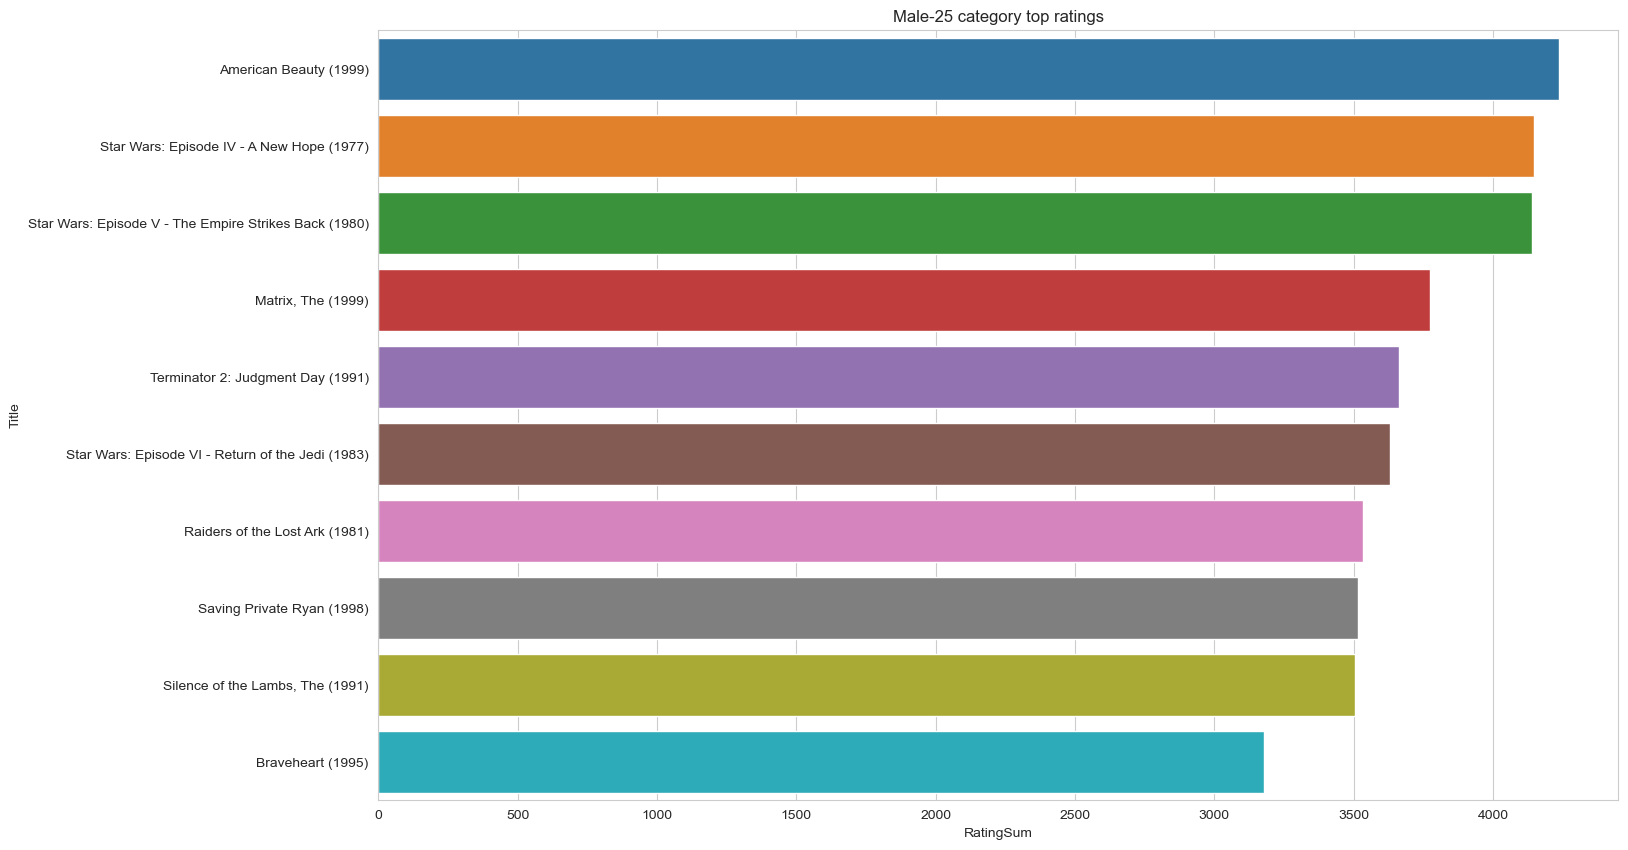

In [143]:
fig, axes = plt.subplots(figsize=(16,10))
barplot_data = agePivot[25]['M'].sort_values(ascending=False).head(10).to_frame()
sb.barplot(data=barplot_data, x='M',y=barplot_data.index)
axes.set(title="Male-25 category top ratings" , xlabel='RatingSum')